# Let's Grow More - "Data Science Intern"

## LGMVIP - August 2023

### By - Mehul Sharma

## Advance Level Task

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from tensorflow.keras.datasets import mnist
import tensorflow as tf

In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
Y_train


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

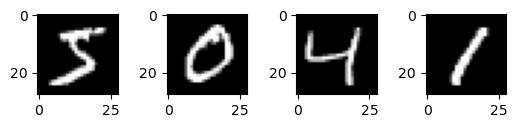

In [57]:
for i in range(4):
    plt.subplot(440 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

###  Pre-processing the data

In [17]:
X_tr = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[2], 1)
X_tt = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[2], 1)


In [28]:
X_tr=tf.keras.utils.normalize(X_train_r, axis = 1)
X_tt= tf.keras.utils.normalize(X_test_r, axis = 1)
n_c = 10

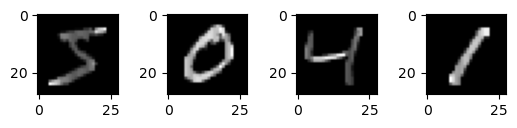

In [56]:
for i in range(4):
    plt.subplot(440 + 1 + i)
    plt.imshow(np.squeeze(X_tr[i]), cmap=plt.get_cmap('gray'))
plt.show()

In [30]:
img = X_tr.shape[1:]
print(img)

(28, 28, 1)


### CNN Model

In [31]:
mod = tf.keras.models.Sequential()
mod.add(tf.keras.layers.Conv2D(48, (3,3), activation = tf.nn.relu, input_shape = img))
mod.add(tf.keras.layers.MaxPool2D((2,2)))
mod.add(tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu))

In [32]:
mod.add(tf.keras.layers.Dropout(0.5))
mod.add(tf.keras.layers.Flatten())
mod.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
mod.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

In [33]:
mod.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
mod.fit(X_tr, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 81s 42ms/step - loss: 0.1452 - accuracy: 0.9555
Epoch 2/10
1875/1875 [==============================] - 78s 41ms/step - loss: 0.0546 - accuracy: 0.9826
Epoch 3/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0385 - accuracy: 0.9881
Epoch 4/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0276 - accuracy: 0.9908
Epoch 5/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0236 - accuracy: 0.9921
Epoch 6/10
1875/1875 [==============================] - 80s 42ms/step - loss: 0.0192 - accuracy: 0.9937
Epoch 7/10
1875/1875 [==============================] - 93s 49ms/step - loss: 0.0171 - accuracy: 0.9944
Epoch 8/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0148 - accuracy: 0.9952
Epoch 9/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0121 - accuracy: 0.9962
Epoch 10/10
1875/1875 [==============================] - 75s 40m

In [35]:
#Summary 
mod.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 48)        480       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 48)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        27712     
                                                                 
 dropout (Dropout)           (None, 11, 11, 64)        0         
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 256)               1982720   
                                                        

## Visualizing the Model

In [40]:
# Confusion Matrix
Y_pred = mod.predict(X_test)
Y_pred_l = [np.argmax(i) for i in Y_pred]
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_pred_l)
cm

313/313 [==============================] - 2s 6ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    0,    0,    0,    0,    2,    1,    5,    0],
       [   6, 1118,    0,    2,    0,    2,    4,    0,    3,    0],
       [   1,    0, 1017,    0,    2,    0,    1,    3,    8,    0],
       [   0,    0,    5,  997,    0,    4,    0,    1,    3,    0],
       [   0,    0,    0,    0,  963,    0,    2,    0,    2,   15],
       [   2,    0,    0,    3,    0,  875,    4,    0,    6,    2],
       [   4,    2,    0,    0,    2,    1,  944,    0,    5,    0],
       [   1,    3,   13,    0,    0,    1,    0, 1002,    2,    6],
       [   2,    0,    0,    0,    0,    0,    0,    0,  972,    0],
       [   1,    0,    0,    0,    2,    9,    0,    1,    8,  988]])>

Text(95.72222222222221, 0.5, 'Truth')

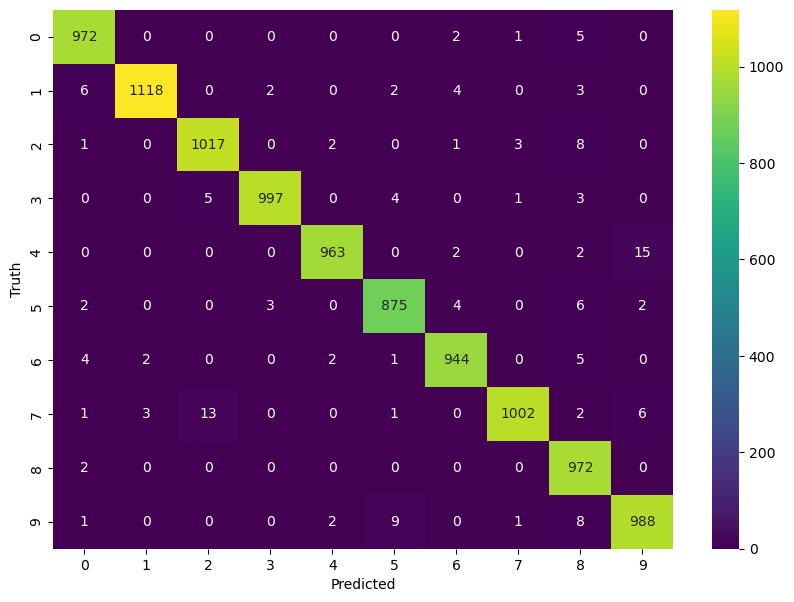

In [41]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'viridis')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
# Accuracy
t_loss, t_accuracy = mod.evaluate(X_test, Y_test)
print("Total Validation loss : ", t_loss*100, "%")
print("Total Validation accuracy : ", t_accuracy*100,"%")

313/313 [==============================] - 2s 7ms/step - loss: 25.9847 - accuracy: 0.9848
Total Validation loss :  2598.4676361083984 %
Total Validation accuracy :  98.47999811172485 %


In [48]:
# Saving The model
mod.save('LGM.keras')

In [49]:
from tensorflow.keras.models import load_model
model = load_model('LGM.keras')

## Testing

In [50]:
pred2=mod.predict(X_test)

313/313 [==============================] - 2s 6ms/step


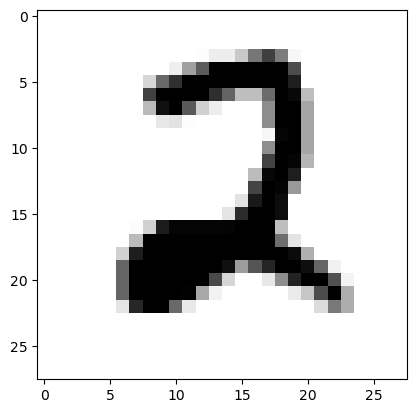

In [58]:
plt.imshow(X_test[82], cmap = plt.get_cmap('binary'))

In [59]:
print("The prediction is : ", np.argmax(pred2[82]))

The prediction is :  2
